In [1]:
#  Imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import json
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from scipy.interpolate import UnivariateSpline

In [2]:
# MCEq Imports
from MCEq.particlemanager import ParticleManager
import MCEq.core 
from MCEq.core import MCEqRun
from MCEq.data import Decays
import mceq_config as config
#import primary model choices
import crflux.models as pm


In [3]:
#config.A_target=1.2
config.muon_helicity_dependence=True

In [4]:
# Silincing mceq, set to 1 or higher for output
config.debug_level = 0

# Launcing mceq
mceq_run = MCEqRun(
    #provide the string of the interaction model
    interaction_model='EPOSLHC',
    #primary cosmic ray flux model
    primary_model = (pm.HillasGaisser2012, "H3a"),
    # Zenith angle in degrees. 0=vertical, 90=horizontal
    theta_deg=0.0
    
)

In [5]:
#list of particles in concern
list_particles=[mceq_run.pman[2212],     #p+           (0)
                mceq_run.pman[-2212],     #pbar-        (1)
                mceq_run.pman[2112],     #n            (2)
                mceq_run.pman[-2112],    #nbar         (3)
                mceq_run.pman[211],      #pi+          (4)
                mceq_run.pman[-211],     #pi-          (5)
                mceq_run.pman[310],      #K_S0         (6) 
                mceq_run.pman[130],      #K_L0         (7)
                mceq_run.pman[321],      #K+           (8)
                mceq_run.pman[-321],     #K-           (9)
                mceq_run.pman[111],      #pi0          (10)
                mceq_run.pman[-3122],    #Lambda_r0    (11)
                mceq_run.pman[3122],     #Lambda0      (12)
                mceq_run.pman[13],   #mu-          (13)
                mceq_run.pman[-13],  #mu+          (14)
                mceq_run.pman[-11],      #e+           (15)   
                mceq_run.pman[11],       #e-           (16)
                mceq_run.pman[12],       #numu         (23)
                mceq_run.pman[-12],      #numubar      (24)
                mceq_run.pman[14],       #nue          (21)
                mceq_run.pman[-14],      #nuebar       (22)
                mceq_run.pman[22]#gamma        (25)
               ]

In [6]:
#list of pdg ids 
list_particles_pdg_id=[]
for i in range(0,len(list_particles)):
    list_particles_pdg_id.append(list_particles[i].pdg_id[0])

In [7]:
"""""
For indices of the particles in phi 
"""""
j=0
ind={}
for i in list_particles:
    ind[i.name,'up']=0+j
    ind[i.name,'low']=121+j
    j=j+121

In [8]:
config.A_target

14.65672

In [9]:
PP_sibyll23c=np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.43213021e-26, 4.42710746e-26, 4.42339734e-26, 4.42099986e-26,
       4.41991500e-26, 4.42014276e-26, 4.42168316e-26, 4.42453619e-26,
       4.42870184e-26, 4.43418012e-26, 4.44097103e-26, 4.44907456e-26,
       4.45849073e-26, 4.46921952e-26, 4.48126094e-26, 4.49461499e-26,
       4.50928167e-26, 4.52526097e-26, 4.54255291e-26, 4.56115747e-26,
       4.57346061e-26, 4.58106674e-26, 4.58365405e-26, 4.58181140e-26,
       4.57512601e-26, 4.58826059e-26, 4.60264959e-26, 4.62065507e-26,
       4.63985778e-26, 4.66264702e-26, 4.68645734e-26, 4.71340243e-26,
       4.74111285e-26, 4.77120913e-26, 4.80177605e-26, 4.83382267e-26,
       4.86672058e-26, 4.90232723e-26, 4.93851279e-26, 4.97654737e-26,
       5.01491471e-26, 5.05434683e-26, 5.09419399e-26, 5.13537392e-26,
       5.17699844e-26, 5.22005326e-26, 5.26359824e-26, 5.30872194e-26,
       5.35438780e-26, 5.40180110e-26, 5.44980499e-26, 5.49971324e-26,
       5.55026673e-26, 5.60290139e-26, 5.65622239e-26, 5.71175746e-26,
       5.76801738e-26, 5.82661584e-26, 5.88595635e-26, 5.94769102e-26,
       6.00954919e-26, 6.07180581e-26, 6.13444579e-26, 6.19832271e-26,
       6.26253692e-26, 6.32783944e-26, 6.39343962e-26, 6.46000021e-26,
       6.52684299e-26, 6.59459636e-26, 6.66258769e-26, 6.73134691e-26,
       6.80030521e-26, 6.86990590e-26, 6.93967348e-26, 7.00997957e-26,
       7.08043940e-26, 7.15139530e-26, 7.22247827e-26, 7.29397133e-26,
       7.36558766e-26, 7.43760174e-26, 7.50971737e-26, 7.58216067e-26,
       7.65469775e-26, 7.72753746e-26, 7.80047444e-26, 7.87372530e-26,
       7.94706004e-26, 8.02066548e-26, 8.09435697e-26, 8.16832607e-26,
       8.24237026e-26, 8.31665673e-26, 8.39101834e-26, 8.46562254e-26,
       8.54031444e-26, 8.61528895e-26, 8.69034444e-26, 8.76566127e-26,
       8.84106224e-26, 8.91673493e-26, 8.99250731e-26, 9.06860101e-26,
       9.14476821e-26, 9.22117235e-26, 9.29767376e-26, 9.37448844e-26,
       9.45138513e-26, 9.52854742e-26, 9.60580683e-26, 9.68337930e-26,
       9.76105129e-26])

In [10]:
S_pdg=open('/home/kruteesh/Desktop/Solar_neutrinos/pdg_sigma_pp')
D=S_pdg.readlines()
E_grid_PDG=[]
sigma_PP_PDG=[]



In [11]:
E_grid_pdg=np.array(
[ 1.40000000e-01, 1.90000000e-01, 2.40000000e-01, 2.80000000e-01,
       3.10000000e-01, 3.50000000e-01, 3.70000000e-01, 3.90000000e-01,
       4.30000000e-01, 4.40000000e-01, 4.90000000e-01, 5.40000000e-01,
       5.70000000e-01, 5.90000000e-01, 6.27000000e-01, 6.65410000e-01,
       6.90000000e-01, 7.20000000e-01, 7.50000000e-01, 7.77000000e-01,
       8.30000000e-01, 8.42880000e-01, 8.57000000e-01, 8.50000000e-01,
       8.92000000e-01, 8.80000000e-01, 9.30000000e-01, 9.57000000e-01,
       9.83000000e-01, 9.79350000e-01, 9.79620000e-01, 9.68240000e-01,
       1.01100000e+00, 1.00549000e+00, 1.02900000e+00, 1.02456000e+00,
       1.03673000e+00, 1.03794000e+00, 1.09008000e+00, 1.11300000e+00,
       1.12800000e+00, 1.12200000e+00, 1.11322000e+00, 1.12700000e+00,
       1.14970000e+00, 1.14234000e+00, 1.18200000e+00, 1.19365000e+00,
       1.22497000e+00, 1.22500000e+00, 1.21898000e+00, 1.25326000e+00,
       1.24413000e+00, 1.26909000e+00, 1.28140000e+00, 1.29158000e+00,
       1.29264000e+00, 1.29388000e+00, 1.33200000e+00, 1.40930000e+00,
       1.41082000e+00, 1.45550000e+00, 1.43300000e+00, 1.48700000e+00,
       1.51836000e+00, 1.54229000e+00, 1.54200000e+00, 1.58637000e+00,
       1.59240000e+00, 1.64000000e+00, 1.61021000e+00, 1.62800000e+00,
       1.66332000e+00, 1.69900000e+00, 1.72455000e+00, 1.69604000e+00,
       1.77325000e+00, 1.78356000e+00, 1.80553000e+00, 1.79700000e+00,
       1.86172000e+00, 1.89800000e+00, 1.93725000e+00, 1.94388000e+00,
       1.95590000e+00, 2.00100000e+00, 2.03267000e+00, 2.05512000e+00,
       2.10125000e+00, 2.08316000e+00, 2.21642000e+00, 2.27195000e+00,
       2.28456000e+00, 2.42384000e+00, 2.45490000e+00, 2.53175000e+00,
       2.59718000e+00, 2.68536000e+00, 2.70941000e+00, 2.82661000e+00,
       2.82464000e+00, 2.86271000e+00, 2.97796000e+00, 2.96392000e+00,
       3.04425000e+00, 2.99999000e+00, 3.06011000e+00, 3.11622000e+00,
       3.13726000e+00, 3.14828000e+00, 3.27000000e+00, 3.28355000e+00,
       3.30961000e+00, 3.46550000e+00, 3.45089000e+00, 3.55309000e+00,
       3.66950000e+00, 3.67024000e+00, 3.73846000e+00, 3.91582000e+00,
       4.10000000e+00, 4.04000000e+00, 4.04507000e+00, 4.20000000e+00,
       4.24200000e+00, 4.27353000e+00, 4.50990000e+00, 4.56110000e+00,
       4.79257000e+00, 4.97593000e+00, 5.23144000e+00, 5.53000000e+00,
       5.53705000e+00, 5.83565000e+00, 5.83020000e+00, 5.96493000e+00,
       6.10200000e+00, 7.07000000e+00, 7.75020000e+00, 7.85067000e+00,
       7.86800000e+00, 8.13600000e+00, 8.20000000e+00, 1.04000000e+01,
       1.01700000e+01, 1.01000000e+01, 1.00000000e+01, 1.00200000e+01,
       1.01100000e+01, 1.22040000e+01, 1.20000000e+01, 1.30000000e+01,
       1.42380000e+01, 1.50000000e+01, 1.65500000e+01, 1.62720000e+01,
       1.86000000e+01, 1.83060000e+01, 1.93300000e+01, 2.04000000e+01,
       1.98000000e+01, 2.03400000e+01, 2.00000000e+01, 2.00000000e+01,
       2.25000000e+01, 2.23740000e+01, 2.30000000e+01, 2.35000000e+01,
       2.40000000e+01, 2.56000000e+01, 2.45000000e+01, 2.50000000e+01,
       2.64200000e+01, 2.98000000e+01, 3.00000000e+01, 3.00000000e+01,
       3.23000000e+01, 3.50000000e+01, 3.50000000e+01, 4.00000000e+01,
       4.00000000e+01, 4.25000000e+01, 4.50000000e+01, 5.00000000e+01,
       5.00000000e+01, 5.00000000e+01, 5.00000000e+01, 5.00000000e+01,
       5.22000000e+01, 5.50000000e+01, 6.00000000e+01, 6.50000000e+01,
       6.90000000e+01, 7.00000000e+01, 7.29939800e+01, 9.79955100e+01,
       1.01000000e+02, 1.00000000e+02, 1.00000000e+02, 1.02000000e+02,
       1.20000000e+02, 1.21996390e+02, 1.46997000e+02, 1.47000000e+02,
       1.50000000e+02, 1.50000000e+02, 1.70000000e+02, 1.71997430e+02,
       1.76750000e+02, 1.95997750e+02, 2.00000000e+02, 2.00000000e+02,
       2.05000000e+02, 2.40000000e+02, 2.80000000e+02, 2.93351860e+02,
       2.93351860e+02, 2.93351860e+02, 2.93351860e+02, 2.93351860e+02,
       2.95861810e+02, 3.00000000e+02, 3.01500000e+02, 3.03000000e+02,
       3.10000000e+02, 3.40000000e+02, 3.70000000e+02, 4.05000000e+02,
       4.98043020e+02, 4.98043020e+02, 4.98043020e+02, 4.98043020e+02,
       4.98043020e+02, 4.98049980e+02, 5.01309720e+02, 5.04586970e+02,
       6.59340140e+02, 1.06380004e+03, 1.06383483e+03, 1.07338439e+03,
       1.08778857e+03, 1.48468920e+03, 1.48468920e+03, 1.48468920e+03,
       1.48468920e+03, 1.48468920e+03, 1.49030004e+03, 1.50728405e+03,
       2.06738403e+03, 2.07410009e+03, 2.08068530e+03, 2.09402905e+03,
       2.09402905e+03, 2.10071679e+03, 2.11412451e+03, 2.57000000e+07,
       4.47000000e+07, 7.76000000e+07, 1.35000000e+08, 2.34000000e+08,
       4.07000000e+08, 4.80000000e+08
])

sigma_pdg=np.array([314.   , 155.   ,  92.   ,  70.   ,  52.8  ,  42.5  ,  37.4  ,
        33.9  ,  28.5  ,  27.7  ,  24.8  ,  25.2  ,  26.1  ,  23.2  ,
        24.55 ,  25.8  ,  22.4  ,  22.4  ,  22.6  ,  23.85 ,  24.3  ,
        24.3  ,  24.4  ,  23.4  ,  24.45 ,  23.2  ,  24.4  ,  25.65 ,
        26.3  ,  24.   ,  26.5  ,  26.9  ,  28.   ,  23.8  ,  27.75 ,
        27.   ,  27.6  ,  28.   ,  29.9  ,  30.95 ,  31.65 ,  32.9  ,
        34.029,  30.   ,  29.8  ,  32.1  ,  34.5  ,  35.6  ,  36.   ,
        39.   ,  36.6  ,  37.7  ,  38.6  ,  39.8  ,  41.8  ,  43.234,
        41.   ,  41.4  ,  43.   ,  44.4  ,  46.487,  46.2  ,  46.   ,
        47.   ,  47.8  ,  47.6  ,  47.4  ,  47.94 ,  46.1  ,  47.5  ,
        47.476,  49.   ,  47.553,  48.   ,  48.   ,  47.4  ,  46.2  ,
        47.49 ,  48.3  ,  47.   ,  47.455,  47.4  ,  46.8  ,  47.357,
        47.409,  47.   ,  47.5  ,  49.4  ,  45.3  ,  47.224,  46.985,
        47.2  ,  46.669,  46.13 ,  45.827,  45.1  ,  45.533,  45.331,
        45.174,  41.4  ,  45.008,  44.928,  45.54 ,  44.651,  44.5  ,
        44.466,  44.401,  44.188,  44.156,  44.114,  47.1  ,  43.61 ,
        43.669,  41.6  ,  43.138,  42.978,  43.2  ,  42.1  ,  42.68 ,
        42.316,  41.6  ,  43.   ,  42.136,  39.7  ,  42.2  ,  41.765,
        42.1  ,  41.457,  41.377,  41.165,  41.171,  41.6  ,  40.878,
        40.848,  41.6  ,  38.3  ,  40.6  ,  40.6  ,  41.6  ,  40.075,
        40.   ,  40.   ,  40.1  ,  39.4  ,  39.9  ,  39.6  ,  40.2  ,
        41.1  ,  40.   ,  39.4  ,  39.6  ,  39.   ,  39.1  ,  39.29 ,
        38.7  ,  38.7  ,  39.7  ,  38.7  ,  38.9  ,  39.7  ,  38.6  ,
        38.4  ,  39.06 ,  38.85 ,  39.4  ,  38.3  ,  39.39 ,  39.7  ,
        38.9  ,  38.7  ,  39.3  ,  38.8  ,  38.8  ,  39.9  ,  38.59 ,
        38.55 ,  38.4  ,  38.49 ,  38.46 ,  38.5  ,  38.85 ,  38.42 ,
        38.45 ,  38.46 ,  38.2  ,  38.14 ,  38.42 ,  37.74 ,  37.87 ,
        38.43 ,  38.44 ,  38.65 ,  36.68 ,  38.28 ,  37.6  ,  37.6  ,
        38.7  ,  38.46 ,  38.39 ,  38.9  ,  38.58 ,  37.   ,  37.6  ,
        38.47 ,  38.69 ,  38.62 ,  38.83 ,  37.4  ,  39.6  ,  38.5  ,
        38.98 ,  38.9  ,  39.   ,  39.24 ,  39.42 ,  39.65 ,  39.4  ,
        39.13 ,  38.8  ,  38.9  ,  38.7  ,  39.21 ,  40.68 ,  39.   ,
        39.59 ,  39.69 ,  39.77 ,  40.6  ,  40.22 ,  40.11 ,  39.91 ,
        40.07 ,  40.2  ,  40.1  ,  40.1  ,  40.   ,  40.42 ,  41.7  ,
        41.9  ,  41.89 ,  42.5  ,  43.01 ,  42.38 ,  42.1  ,  42.85 ,
        42.71 ,  42.4  ,  42.9  ,  43.55 ,  43.1  ,  44.   ,  43.82 ,
        42.96 ,  44.1  ,  42.2  ,  93.   , 101.   , 117.   , 104.   ,
       100.   , 124.   , 120.   ])

In [12]:
D

['1    0.14000    0.14000    0.14000    314.00     13.000  13.000     0.0  0.0  BARASHENKOV 61   FP 9, 549\n',
 ' 2    0.19000    0.19000    0.19000    155.00     2.0000  2.0000     0.0  0.0  BARASHENKOV 61   FP 9, 549\n',
 ' 3    0.24000    0.24000    0.24000    92.000     1.0000  1.0000     0.0  0.0  BARASHENKOV 61   FP 9, 549\n',
 ' 4    0.28000    0.28000    0.28000    70.000     1.0000  1.0000     0.0  0.0  BARASHENKOV 61   FP 9, 549\n',
 ' 5    0.31000    0.31000    0.31000    52.800     6.0000  6.0000     0.0  0.0  BARASHENKOV 61   FP 9, 549\n',
 ' 6    0.35000    0.35000    0.35000    42.500     0.40000 0.40000    0.0  0.0  BARASHENKOV 61   FP 9, 549\n',
 ' 7    0.37000    0.37000    0.37000    37.400     2.3000  2.3000     0.0  0.0  BARASHENKOV 61   FP 9, 549\n',
 ' 8    0.39000    0.39000    0.39000    33.900     2.0000  2.0000     0.0  0.0  BARASHENKOV 61   FP 9, 549\n',
 ' 9    0.43000    0.43000    0.43000    28.500     1.3000  1.3000     0.0  0.0  BARASHENKOV 61   FP 9, 5

In [13]:
for j,i in enumerate(D):
    if j==len(D)-2:
        break
    print(float(i.split('   ')[3]))
    #E_grid_PDG.append(float(i.split(' ')[3]))
   # sigma_PP_PDG.append(float(i.split(' ')[4]))

0.14
0.19
0.24
0.28
0.31
0.35
0.37
0.39
0.43
0.44
0.49
0.54
0.57
0.59
0.627
0.66541
0.69
0.72
0.75
0.777
0.83
0.84288
0.857
0.85
0.892
0.88
0.93
0.957
0.983
0.97935
0.97962
0.96824
1.011
1.00549
1.029
1.02456
1.03673
1.03794
1.09008
1.113
1.128
1.122
1.11322
1.127
1.1497
1.14234
1.182
1.19365
1.22497
1.225
1.21898
1.25326
1.24413
1.26909
1.2814
1.29158
1.29264
1.29388
1.332
1.4093
1.41082
1.4555
1.433
1.487
1.51836
1.54229
1.542
1.58637
1.5924
1.64
1.61021
1.628
1.66332
1.699
1.72455
1.69604
1.77325
1.78356
1.80553
1.797
1.86172
1.898
1.93725
1.94388
1.9559
2.001
2.03267
2.05512
2.10125
2.08316
2.21642
2.27195
2.28456
2.42384
2.4549
2.53175
2.59718
2.68536
2.70941
41.4
45.008
44.928
45.54
44.651
44.5
44.466
44.401
44.188
44.156
44.114
47.1
43.61
43.669
41.6
43.138
42.978
43.2
42.1
42.68
42.316
41.6
43.0
42.136
39.7
42.2
41.765
42.1
41.457
41.377
41.165
41.171
41.6
40.878
40.848
41.6
38.3
40.6
40.6
41.6
40.075
40.0
40.0
40.1
39.4
39.9
39.6
40.2
41.1
40.0
39.4
39.6
39.0
39.1
39.29
38.7
3

ValueError: could not convert string to float: '  3.0  3.0  BRENNER 82'

In [45]:
PP_QSJETII03=np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.43213021e-26, 4.42710746e-26, 4.42339734e-26, 4.42099986e-26,
       4.41991500e-26, 4.42014276e-26, 4.42168316e-26, 4.42453619e-26,
       4.42870184e-26, 4.43418012e-26, 4.44097103e-26, 4.44907456e-26,
       4.45849073e-26, 4.46921952e-26, 4.48126094e-26, 4.49461499e-26,
       4.50928167e-26, 4.52526097e-26, 4.54255291e-26, 4.56115747e-26,
       4.54698628e-26, 4.54154567e-26, 4.54405086e-26, 4.55226486e-26,
       4.56504245e-26, 4.60249330e-26, 4.64050588e-26, 4.67908001e-26,
       4.71821719e-26, 4.75792033e-26, 4.79819348e-26, 4.83904166e-26,
       4.88047068e-26, 4.92211485e-26, 4.96409548e-26, 5.00682519e-26,
       5.05031593e-26, 5.09458016e-26, 5.13963079e-26, 5.18548115e-26,
       5.23214502e-26, 5.27963654e-26, 5.32797029e-26, 5.37706819e-26,
       5.42697275e-26, 5.47780241e-26, 5.52957431e-26, 5.58230604e-26,
       5.63601559e-26, 5.69072142e-26, 5.74644242e-26, 5.80319793e-26,
       5.86100776e-26, 5.92098600e-26, 5.98283808e-26, 6.04537539e-26,
       6.10860588e-26, 6.17253761e-26, 6.23717874e-26, 6.30253753e-26,
       6.36862235e-26, 6.43544165e-26, 6.50300401e-26, 6.57254665e-26,
       6.64372560e-26, 6.71519024e-26, 6.78693322e-26, 6.85894708e-26,
       6.93122422e-26, 7.00375689e-26, 7.07653721e-26, 7.14955715e-26,
       7.22280857e-26, 7.29671421e-26, 7.37114129e-26, 7.44560418e-26,
       7.52008869e-26, 7.59458046e-26, 7.66906500e-26, 7.74352768e-26,
       7.81795370e-26, 7.89232817e-26, 7.96663606e-26, 8.04058908e-26,
       8.11425146e-26, 8.18791009e-26, 8.26155264e-26, 8.33516671e-26,
       8.40873975e-26, 8.48225912e-26, 8.55571213e-26, 8.62908590e-26,
       8.70236756e-26, 8.77554415e-26, 8.84860247e-26, 8.92152939e-26,
       8.99431179e-26, 9.06693621e-26, 9.13938934e-26, 9.21165779e-26,
       9.28372787e-26, 9.35558594e-26, 9.42721868e-26, 9.49861231e-26,
       9.56975319e-26, 9.64062751e-26, 9.71122152e-26, 9.78152102e-26,
       9.85151234e-26, 9.92118214e-26, 9.99051624e-26, 1.00595007e-25,
       1.01281213e-25])

In [46]:
PP_EPOSLHC=np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.65442446e-25, 2.65141632e-25, 2.64919431e-25, 2.64775844e-25,
       2.64710872e-25, 2.64724513e-25, 2.64816768e-25, 2.64987637e-25,
       2.65237120e-25, 2.65565217e-25, 2.65971927e-25, 2.66457252e-25,
       2.67021191e-25, 2.67663744e-25, 2.68384910e-25, 2.69184691e-25,
       2.70063085e-25, 2.71020094e-25, 2.72055716e-25, 2.73169952e-25,
       2.72708601e-25, 2.72306864e-25, 2.71969530e-25, 2.71701385e-25,
       2.71507219e-25, 2.73077560e-25, 2.74734494e-25, 2.76478023e-25,
       2.78308146e-25, 2.80224863e-25, 2.82228174e-25, 2.84318080e-25,
       2.86494579e-25, 2.88757673e-25, 2.91107360e-25, 2.93548688e-25,
       2.96098250e-25, 2.98757347e-25, 3.01525979e-25, 3.04404146e-25,
       3.07391849e-25, 3.10489086e-25, 3.13681126e-25, 3.16757063e-25,
       3.19648083e-25, 3.22354184e-25, 3.24875368e-25, 3.27159352e-25,
       3.28762068e-25, 3.29582467e-25, 3.30266010e-25, 3.31540334e-25,
       3.33406082e-25, 3.35863253e-25, 3.38911849e-25, 3.42551868e-25,
       3.46783312e-25, 3.51479764e-25, 3.56161590e-25, 3.60782280e-25,
       3.65341833e-25, 3.69840249e-25, 3.74277530e-25, 3.78653674e-25,
       3.82976704e-25, 3.87394507e-25, 3.91962559e-25, 3.96680861e-25,
       4.01549411e-25, 4.06568211e-25, 4.11737261e-25, 4.17056559e-25,
       4.22443167e-25, 4.27788132e-25, 4.33090964e-25, 4.38351662e-25,
       4.43570227e-25, 4.48746660e-25, 4.53880958e-25, 4.58981801e-25,
       4.64087315e-25, 4.69201992e-25, 4.74325831e-25, 4.79458832e-25,
       4.84600995e-25, 4.89752319e-25, 4.94912806e-25, 5.00082454e-25,
       5.05261265e-25, 5.10449237e-25, 5.15646372e-25, 5.20852668e-25,
       5.26068126e-25, 5.31292746e-25, 5.36497786e-25, 5.41639506e-25,
       5.46717447e-25, 5.51731609e-25, 5.56681992e-25, 5.61568596e-25,
       5.66391421e-25, 5.71156468e-25, 5.75894441e-25, 5.80609668e-25,
       5.85302147e-25, 5.89971879e-25, 5.94618864e-25, 5.99243102e-25,
       6.03851379e-25, 6.08680690e-25, 6.13848366e-25, 6.19354408e-25,
       6.25198815e-25])/(14.65672**(2/3))

In [47]:
PP_sibyll_cpp=np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.65442446e-25, 2.65141632e-25, 2.64919431e-25, 2.64775844e-25,
       2.64710872e-25, 2.64724513e-25, 2.64816768e-25, 2.64987637e-25,
       2.65237120e-25, 2.65565217e-25, 2.65971927e-25, 2.66457252e-25,
       2.67021191e-25, 2.67663744e-25, 2.68384910e-25, 2.69184691e-25,
       2.70063085e-25, 2.71020094e-25, 2.72055716e-25, 2.73169952e-25,
       2.25675124e-25, 1.77804578e-25, 1.29520592e-25, 8.08038669e-26,
       3.16083135e-26, 3.18598623e-26, 3.21271472e-26, 3.24395728e-26,
       3.27657967e-26, 3.31331759e-26, 3.35116452e-26, 3.39240277e-26,
       3.43442154e-26, 3.47886353e-26, 3.52372544e-26, 3.56989947e-26,
       3.61712071e-26, 3.66767212e-26, 3.71900943e-26, 3.77285648e-26,
       3.82780199e-26, 3.88627081e-26, 3.94542573e-26, 4.00678435e-26,
       4.06889677e-26, 4.13343460e-26, 4.19882645e-26, 4.26696918e-26,
       4.33608726e-26, 4.40834918e-26, 4.48171528e-26, 4.55864194e-26,
       4.63682528e-26, 4.71906202e-26, 4.80270199e-26, 4.89086877e-26,
       4.98059692e-26, 5.07536246e-26, 5.17182787e-26, 5.27377788e-26,
       5.37506875e-26, 5.47423265e-26, 5.57438672e-26, 5.67773569e-26,
       5.78203448e-26, 5.88939801e-26, 5.99767690e-26, 6.10890936e-26,
       6.22106346e-26, 6.33619145e-26, 6.45218825e-26, 6.57098854e-26,
       6.69060778e-26, 6.81286958e-26, 6.93590657e-26, 7.06144495e-26,
       7.18774692e-26, 7.31651285e-26, 7.44599753e-26, 7.57780146e-26,
       7.71032072e-26, 7.84514820e-26, 7.98064492e-26, 8.11830115e-26,
       8.25660505e-26, 8.39699884e-26, 8.53803970e-26, 8.68116853e-26,
       8.82490448e-26, 8.97059951e-26, 9.11689367e-26, 9.26512090e-26,
       9.41390872e-26, 9.56450547e-26, 9.71564773e-26, 9.86855059e-26,
       1.00220118e-25, 1.01772739e-25, 1.03330635e-25, 1.04905548e-25,
       1.06485646e-25, 1.08082482e-25, 1.09684700e-25, 1.11304283e-25,
       1.12928488e-25, 1.14567605e-25, 1.16211742e-25, 1.17872061e-25,
       1.19536902e-25, 1.21216352e-25, 1.22900539e-25, 1.24600004e-25,
       1.26304138e-25])

In [33]:
def A(x,a,b):
    a=14.6567
    return x/a**(b) 

In [34]:
from scipy.optimize import curve_fit


In [35]:
popt,pcov=curve_fit(A,PP_EPOSLHC,PP_sibyll_cpp,)

NameError: name 'PP_EPOSLHC' is not defined

In [36]:
popt,pcov

NameError: name 'popt' is not defined

In [37]:
Lit_p_x=np.array([3.11374109e+00, 3.45518507e+00, 3.91540934e+00, 4.39662170e+00,
       4.95955821e+00, 5.59457222e+00, 6.31089242e+00, 7.11892913e+00,
       8.03042559e+00, 9.05862861e+00, 1.01998447e+01, 1.15268393e+01,
       1.30027177e+01, 1.46675651e+01, 1.65455770e+01, 1.86640466e+01,
       2.10537617e+01, 2.37494521e+01, 2.67902945e+01, 3.02204815e+01,
       3.40898643e+01, 3.84546767e+01, 4.30234784e+01, 5.22561314e+01,
       7.10109536e+01, 8.01030841e+01, 9.23605616e+01, 1.01039607e+02,
       1.98818499e+02, 2.24274906e+02, 2.52990711e+02, 2.85383242e+02,
       3.21923262e+02, 3.59186111e+02, 3.92078723e+02, 5.46987608e+02,
       6.14325712e+02, 6.92983007e+02, 7.81711458e+02, 8.81800560e+02,
       9.94704913e+02, 1.12911007e+03, 1.27656143e+03, 1.42779528e+03,
       1.61060793e+03, 1.81682763e+03, 2.04945137e+03, 2.31185989e+03,
       2.60786679e+03, 2.94177393e+03, 3.31843403e+03, 3.73454575e+03,
       4.22261001e+03, 4.76326634e+03, 5.37314744e+03, 6.06111677e+03,
       6.84293547e+03, 7.74080288e+03, 8.70010168e+03, 9.81404897e+03,
       1.10706243e+04, 1.24880896e+04, 1.41385695e+04, 1.58907279e+04,
       1.78600270e+04, 1.97462829e+04, 6.04593294e+04, 6.82004466e+04,
       7.69327242e+04, 8.67830688e+04, 9.78946361e+04, 1.10428911e+05,
       1.24568054e+05, 1.40517552e+05, 1.58509197e+05, 1.78804465e+05,
       2.01698306e+05, 2.27523439e+05, 2.56655181e+05, 2.89516906e+05,
       3.26586194e+05, 3.68401775e+05, 4.15571357e+05, 4.68780458e+05,
       5.08914565e+05, 7.03020593e+05, 7.93034240e+05, 8.60928967e+05,
       3.05699070e+04, 4.74756138e+04, 1.45132510e+02])

In [38]:
Lit_p_y=np.array([ 23.84597165,  26.12519157,  27.82550414,  29.02053247,
        29.57876841,  29.98280484,  30.34251507,  30.86049352,
        30.94172663,  31.2828402 ,  31.46603347,  31.64191272,
        31.85361241,  32.07084079,  32.20684392,  32.24817074,
        32.72306134,  32.95466979,  33.41853045,  33.67664695,
        34.23836835,  34.59585587,  34.56093696,  34.6402482 ,
        36.80638123,  37.46351827,  38.28427614,  38.56019038,
        42.22491845,  43.0118784 ,  43.72931005,  44.16748262,
        45.30472575,  45.93064102,  46.25573054,  48.95447169,
        49.99362768,  50.84707117,  51.69519265,  52.73974761,
        53.70201261,  55.34191965,  56.29296576,  57.18464696,
        58.1645779 ,  59.16509457,  60.08642985,  61.13568263,
        62.11034283,  63.03434023,  64.28327964,  64.65707911,
        67.12649009,  68.27240944,  69.75918824,  71.00466103,
        71.06527186,  73.42527299,  74.48823257,  76.16895676,
        77.54378311,  79.1715274 ,  80.44738085,  81.74030069,
        83.0220548 ,  86.61073112,  99.38257004, 100.11165579,
       101.66410366, 103.08187947, 104.95106813, 106.19740801,
       107.99368926, 109.62618338, 111.2833552 , 113.27019586,
       115.4256466 , 117.260673  , 118.94170222, 120.60042602,
       122.47059661, 124.17853326, 126.0556867 , 128.80082084,
       130.86106962, 135.51036118, 136.03267889, 137.24166266,
        90.06280202,  94.9014236 ,  40.0195985 ])

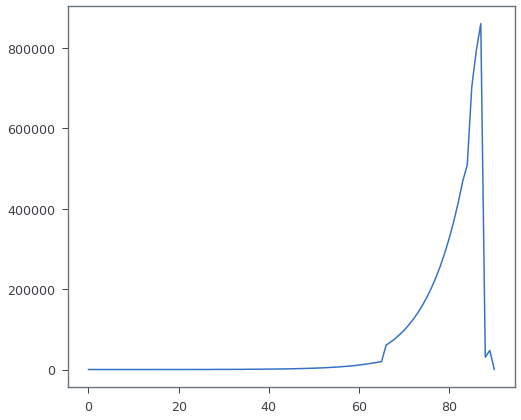

In [39]:
plt.plot(Lit_p_x)

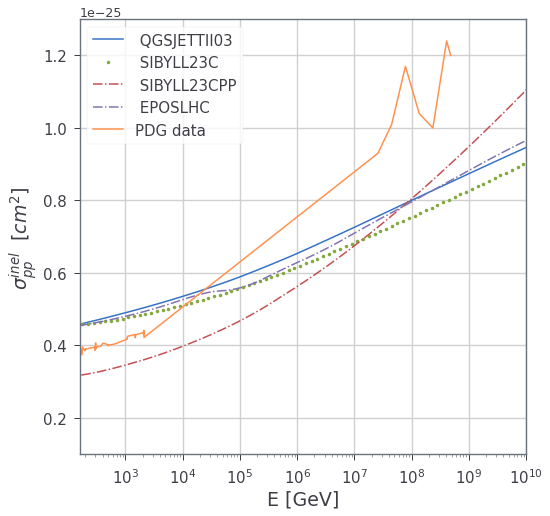

In [48]:
plt.figure(figsize=(8,8))
plt.plot(mceq_run.e_grid, PP_QSJETII03,label=r' QGSJETTII03' )
plt.plot(mceq_run.e_grid,PP_sibyll23c,'.',label=r' SIBYLL23C')
plt.plot(mceq_run.e_grid,PP_sibyll_cpp,'-.',label=r' SIBYLL23CPP')
plt.plot(mceq_run.e_grid,PP_EPOSLHC,'-.',label=r' EPOSLHC')
plt.plot(E_grid_pdg,sigma_pdg*1e-27,label='PDG data')
#plt.plot(Lit_p_x,(np.array(Lit_p_y)),'.',label=r' literature!!')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('E [GeV]',fontsize=19)
plt.ylabel(r'$\sigma^{inel}_{pp}$  $[cm^2]$',fontsize=19)
plt.xlim((1.6e2,1e10))
plt.ylim((0.1e-25,1.3e-25))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid()

In [49]:
E_grid=np.array([0.14,0.19,0.24,0.28,0.31,0.35,0.37,0.39,0.43,0.44,0.49,0.54,0.57,0.59,0.61026,0.627,0.66541,0.69,0.72,0.75,0.777,0.7605,0.83,0.84288,0.857,0.85,0.87473,0.892,0.88,0.93,0.957,0.94019,0.983,0.96615,0.97935,0.97962,0.96824,0.99452,1.011,1.00549,1.01164,1.029,1.02456,1.03794,1.03673,1.09008,1.113,1.09601,1.11045,1.128,1.122,1.11322,1.127,1.1497,1.14234,1.16425,1.182,1.19365,1.22497,1.225,1.21898,1.25326,1.24413,1.26909,1.2814,1.29158,1.29264,1.29388,1.332,1.4093,1.41082,1.4555,1.433,1.487,1.51836,1.54229,1.542,1.58637,1.5924,1.64,1.61021,1.628,1.66332,1.699,1.69604,1.72455,1.77325,1.78356,1.80553,1.797,1.86172,1.898,1.93725,1.94388,1.9559,2.001,2.03267,2.05512,2.10125,2.08316,2.21642,2.27195,2.28456,2.42384,2.4549,2.53175,2.59718,2.68536,2.70941,2.82661,2.82464,2.86271,2.97796,2.96392,3.04425,2.99999,3.06011,3.11622,3.13726,3.14828,3.27,3.28355,3.30961,3.4655,3.45089,3.55309,3.6695,3.67024,3.73846,3.91582,4.04,4.1,4.04507,4.2,4.242,4.27353,4.5099,4.5611,4.79257,4.97593,5.23144,5.53,5.53705,5.83565,5.8302,5.96493,6.102,7.07,7.7502,7.85067,7.868,8.136,8.2,10.4,10.17,10.1,10,10.02,10.11,12.204,12,13,14.238,15,16.55,16.272,18.6,18.306,19.33,20.4,19.8,20.34,20,20,22.5,22.374,23,23.5,24,25.6,24.5,25,26.42,29.8,30,30,32.3,35,35,40,40,42.5,45,50,50,50,50,50,52.2,55,60,65,69,70,72.99398,97.99551,101,100,100,102,120,121.99639,146.997,147,150,150,170,171.99743,176.75,195.99775,200,200,205,240,280,293.35186,293.35186,293.35186,293.35186,293.35186,295.86181,300,301.5,303,310,340,370,405,498.04302,498.04302,498.04302,498.04302,498.04302,498.04998,501.30972,504.58697,659.34014,1063.80004,1063.83483,1073.38439,1087.78857,1484.6892,1484.6892,1484.6892,1484.6892,1484.6892,1490.30004,1507.28405,2067.38403,2074.10009,2080.6853,2094.02905,2094.02905,2100.71679,2114.12451,7944.20019,15850,31624,63097,158490,25704000,26112000,26112000,26112000,34104000,44668000,77625000,134900000,234420000,407380000,479610000,2115100000])
sigma_pp=np.array([314,155,92,70,52.8,42.5,37.4,33.9,28.5,27.7,24.8,25.2,26.1,23.2,24.2,24.55,25.8,22.4,22.4,22.6,23.85,23.85,24.3,24.3,24.4,23.4,24.55,24.45,23.2,24.4,25.65,25.7,26.3,26.5,24,26.5,26.9,24.2,28,23.8,27.95,27.75,27,28,27.6,29.9,30.95,31.25,31.95,31.65,32.9,34.029,30,29.8,32.1,34.8,34.5,35.6,36,39,36.6,37.7,38.6,39.8,41.8,43.234,41,41.4,43,44.4,46.487,46.2,46,47,47.8,47.6,47.4,47.94,46.1,47.5,47.476,49,47.553,48,47.4,48,46.2,47.49,48.3,47,47.455,47.4,46.8,47.357,47.409,47,47.5,49.4,45.3,47.224,46.985,47.2,46.669,46.13,45.827,45.1,45.533,45.331,45.174,41.4,45.008,44.928,45.54,44.651,44.5,44.466,44.401,44.188,44.156,44.114,47.1,43.61,43.669,41.6,43.138,42.978,43.2,42.1,42.68,42.316,43,41.6,42.136,39.7,42.2,41.765,42.1,41.457,41.377,41.165,41.171,41.6,40.878,40.848,41.6,38.3,40.6,40.6,41.6,40.075,40,40,40.1,39.4,39.9,39.6,40.2,41.1,40,39.4,39.6,39,39.1,39.29,38.7,38.7,39.7,38.7,38.9,39.7,38.6,38.4,39.06,38.85,39.4,38.3,39.39,39.7,38.9,38.7,39.3,38.8,38.8,39.9,38.59,38.55,38.4,38.49,38.46,38.5,38.85,38.42,38.45,38.46,38.2,38.14,38.42,37.74,37.87,38.43,38.44,38.65,36.68,38.28,37.6,37.6,38.7,38.46,38.39,38.9,38.58,37,37.6,38.47,38.69,38.62,38.83,37.4,39.6,38.5,38.98,38.9,39,39.24,39.42,39.65,39.4,39.13,38.8,38.9,38.7,39.21,40.68,39,39.59,39.69,39.77,40.6,40.22,40.11,39.91,40.07,40.2,40.1,40.1,40,40.42,41.7,41.9,41.89,42.5,43.01,42.38,42.1,42.85,42.71,42.4,42.9,43.55,43.1,44,43.82,42.96,44.1,42.2,43,48,54,56,54,93,98.3,98.58,98,101.7,101,117,104,100,124,120,133])

In [50]:
ex_p=np.array([],dtype=int)
for i,j in enumerate(E_grid):
    if i==len(E_grid)-1:
        continue
    if j>=E_grid[i+1]:
        
        ex_p=np.append(ex_p,i)
        

In [51]:
E_grid_pp_d=np.delete(E_grid,ex_p)
sigma_pp_d=np.delete(sigma_pp,ex_p)


In [52]:
ttt=np.array([])
for j,i in enumerate(E_grid_pp_d):
    tt=i-E_grid_pp_d[j-1]
    if tt<=0:
        print(j)
        ttt=np.append(ttt,j)


0
30
46


In [53]:
E_grid_pp_d=np.delete(E_grid_pp_d,[0,30,46])
sigma_pp_d=np.delete(sigma_pp_d,[0,30,46])

In [54]:
len(E_grid_pp_d),len(sigma_pp_d)

(215, 215)

In [55]:
sigma_final=UnivariateSpline(E_grid_pp_d,sigma_pp_d,k=1,s=2)

In [56]:
for i in range(0,30):
    PP_sibyll_cpp[i]=PP_sibyll_cpp[i]

In [57]:
def poly_fit(x,a,b,c,d,e):
    return PP_sibyll_cpp[32:]*(a*x**(4) + b*x**(3) + c*x**(2) +d*x + e)*1e27

In [58]:
popt, pcurv=curve_fit(poly_fit,mceq_run.e_grid[32:],sigma_final(mceq_run.e_grid[32:]))

In [59]:
popt,pcurv

(array([ 1.06880159e-45, -5.36667352e-34,  4.73937497e-23,  5.91859334e-11,
         1.18873635e+00]),
 array([[ 1.75880650e-87, -2.92655466e-76,  1.44054448e-65,
         -2.00258682e-55,  1.76235667e-46],
        [-2.92655466e-76,  4.94812637e-65, -2.49218854e-54,
          3.58626165e-44, -3.33226374e-35],
        [ 1.44054448e-65, -2.49218854e-54,  1.29939486e-43,
         -1.97758214e-33,  2.03003522e-24],
        [-2.00258682e-55,  3.58626165e-44, -1.97758214e-33,
          3.33576920e-23, -4.32721956e-14],
        [ 1.76235667e-46, -3.33226374e-35,  2.03003522e-24,
         -4.32721956e-14,  2.18290631e-04]]))

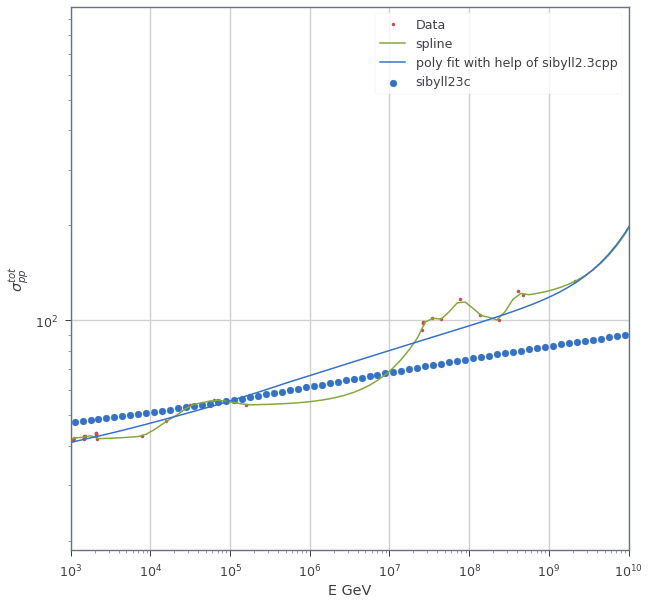

In [60]:
plt.figure(figsize=(10,10))
plt.plot(E_grid,sigma_pp,"r.",label="Data")
plt.plot(mceq_run.e_grid,sigma_final(mceq_run.e_grid),"g",label="spline")
#plt.scatter(mceq_run.e_grid,PP_sibyll_cpp*1e27,label="sibyllcpp")
plt.scatter(mceq_run.e_grid,PP_sibyll23c*1e27,label="sibyll23c")
plt.plot(mceq_run.e_grid[32:],poly_fit(mceq_run.e_grid[32:],*popt),label="poly fit with help of sibyll2.3cpp")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("E GeV")
plt.ylabel(r"$\sigma^{tot}_{pp}$")
plt.xlim((10e2,10e9))
plt.legend()
plt.grid()

<ipython-input-76-c5630860aa08>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(sigma_final(mceq_run.e_grid)/PP_sibyll23c*1e-27)


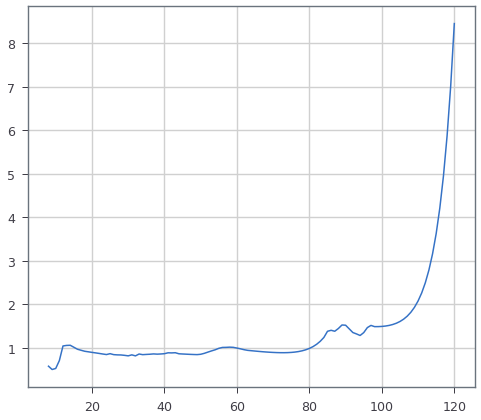

In [76]:
plt.plot(sigma_final(mceq_run.e_grid)/PP_sibyll23c*1e-27)
plt.grid()